In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,f1_score,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
dataset = pd.read_pickle('df_FinalDataset.csv')

In [5]:
# Define columns to be removed
remove_these_columns = ['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'AttendingPhysician',
                        'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
                        'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
                        'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
                        'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                        'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
                        'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
                        'ClmAdmitDiagnosisCode', 'DiagnosisGroupCode',
                        ]

In [6]:
# Remove unnecessary columns
Train_category_removed = dataset.drop(axis=0, columns=remove_these_columns)

In [7]:
# Define features (X) and target variable (Y)
X_df = Train_category_removed[['InscClaimAmtReimbursed','OPAnnualDeductibleAmt',
                               'IPAnnualDeductibleAmt', 'IPAnnualReimbursementAmt', 
                               'OPAnnualReimbursementAmt', 'State', 'County',]]

In [8]:
Y_df = Train_category_removed['PotentialFraud']

In [9]:
# Convert 'Yes' and 'No' to 1 and 0
Y_df.replace(['Yes', 'No'], [1, 0], inplace=True)

In [10]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, test_size=0.3, random_state=101)

In [11]:
# Choose the value of k (number of neighbors)
k = 3

In [12]:
# Create the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

In [13]:
KNN_param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'p': [1, 2],}

In [14]:
# Initialize Grid Search with cross-validation
grid_search_KNN = GridSearchCV(estimator=knn_classifier,
                                      param_grid=KNN_param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=0)

In [15]:
# Train the model
grid_search_KNN.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [16]:
# Get the best parameters
best_params_KNN =grid_search_KNN.best_params_

In [17]:
# Use the best parameters to create a new model
best_KNN_classifier = KNeighborsClassifier(**best_params_KNN)

In [18]:
# Fit the new model
best_KNN_classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

In [19]:
# Predict on the test set
Y_pred =best_KNN_classifier.predict(X_test)

In [20]:
# Evaluate the model
accuracy = accuracy_score(Y_test,Y_pred)
f1 = f1_score(Y_test,Y_pred)
class_rep = classification_report(Y_test,Y_pred)
conf_matrix = confusion_matrix(Y_test,Y_pred)

In [21]:
print("Best Hyperparameters:",best_params_KNN)
print("\nAccuracy:", round(accuracy * 100, 2))
print("F1 Score:", round(f1 * 100, 2))
print("\nClassification Report:\n", class_rep)
print("\nConfusion Matrix:\n", conf_matrix)

Best Hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

Accuracy: 65.52
F1 Score: 53.55

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.73    103529
           1       0.55      0.52      0.54     63935

    accuracy                           0.66    167464
   macro avg       0.63      0.63      0.63    167464
weighted avg       0.65      0.66      0.65    167464


Confusion Matrix:
 [[76438 27091]
 [30655 33280]]


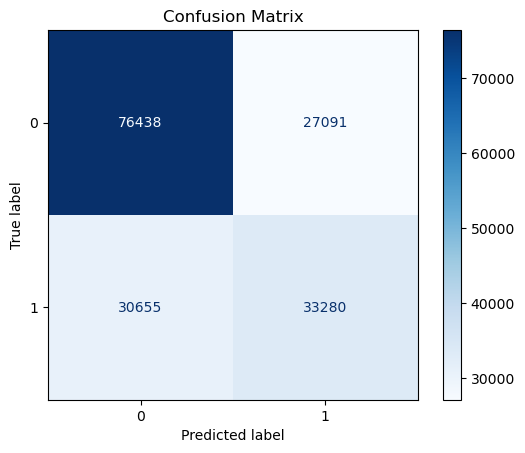

In [22]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_KNN_classifier.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [23]:
# Convert 'Dead_Alive' to 1 and 0
Train_category_removed['Dead_Alive'].replace(['Yes', 'No'], [1, 0], inplace=True)

In [24]:
# Define features (X) and target variable (Y)
X_df = Train_category_removed[['InscClaimAmtReimbursed','Claim_Duration', 'Att_Phy_tot_claims', 'OPAnnualDeductibleAmt',
                               'IPAnnualDeductibleAmt', 'IPAnnualReimbursementAmt', 
                               'OPAnnualReimbursementAmt', 'State', 'County', 'Dead_Alive']]

In [25]:
# Convert 'Yes' and 'No' to 1 and 0
Y_df.replace(['Yes', 'No'], [1, 0], inplace=True)

In [26]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, test_size=0.3, random_state=101)

In [27]:
# Create the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

In [28]:
KNN_param_grid = {'n_neighbors': [10,15,18], 'weights': ['uniform', 'distance'], 'p': [2,5],}

In [29]:
# Initialize Grid Search with cross-validation
grid_search_KNN = GridSearchCV(estimator=knn_classifier,
                                      param_grid=KNN_param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=0)

In [30]:
# Train the model
grid_search_KNN.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=-1,
             param_grid={'n_neighbors': [10, 15, 18], 'p': [2, 5],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [31]:
# Get the best parameters
best_params_KNN =grid_search_KNN.best_params_

In [32]:
# Use the best parameters to create a new model
best_KNN_classifier = KNeighborsClassifier(**best_params_KNN)

In [33]:
# Fit the new model
best_KNN_classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [34]:
# Predict on the test set
Y_pred =best_KNN_classifier.predict(X_test)

In [37]:
#Evaluate the model
accuracy = accuracy_score(Y_test,Y_pred)
f1 = f1_score(Y_test,Y_pred)
class_rep = classification_report(Y_test,Y_pred)
conf_matrix = confusion_matrix(Y_test,Y_pred)

In [38]:
print("Best Hyperparameters:",best_params_KNN)
print("\nAccuracy:", round(accuracy * 100, 2))
print("F1 Score:", round(f1 * 100, 2))
print("\nClassification Report:\n", class_rep)
print("\nConfusion Matrix:\n", conf_matrix)

Best Hyperparameters: {'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

Accuracy: 71.81
F1 Score: 57.83

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.85      0.79    103529
           1       0.67      0.51      0.58     63935

    accuracy                           0.72    167464
   macro avg       0.71      0.68      0.68    167464
weighted avg       0.71      0.72      0.71    167464


Confusion Matrix:
 [[87898 15631]
 [31570 32365]]


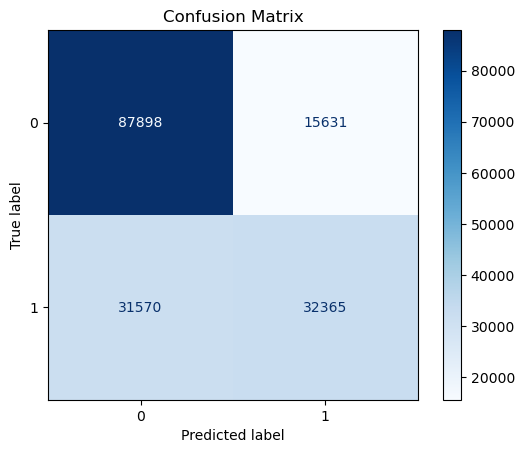

In [39]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_KNN_classifier.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='d')
plt.title('Confusion Matrix')
plt.show()